In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas as pd
print(pd.__version__)

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        # Any results you write to the current directory are saved as output.

0.25.1
./train.csv
./.README.md.swp
./test.csv
./README.md
./DigitRecognizer.ipynb
./.idea/DigitRecognizer.iml
./.idea/vcs.xml
./.idea/.gitignore
./.idea/misc.xml
./.idea/modules.xml
./.idea/workspace.xml
./.idea/inspectionProfiles/profiles_settings.xml
./.ipynb_checkpoints/DigitRecognizer-checkpoint.ipynb


In [3]:
import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten#, Dropout, Activation
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [5]:
height = 28
width = 28
classes = 10

In [6]:
# training images
X_train = train_df.drop('label', 1).to_numpy().reshape(len(train_df),height,width,1).astype('float32')
X_train /= 255

# training lables          
y_train = to_categorical(train_df['label'],classes)

# test images
X_test = test_df.to_numpy().reshape(len(test_df),height,width,1).astype('float32')
X_test /= 255


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(42000, 10)
(28000, 28, 28, 1)


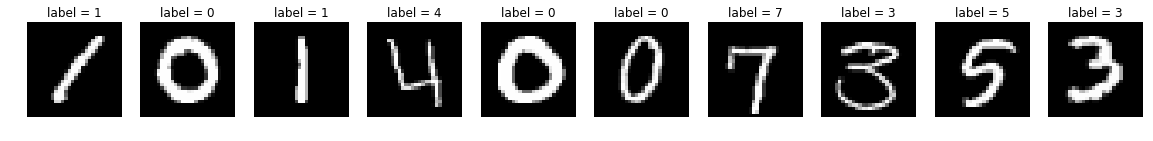

In [8]:
# visualise some training labels
f, axarr = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    image = X_train[i].reshape(28,28)
    axarr[i].axis('off')
    axarr[i].set_title("label = " + str(train_df['label'][i]))
    axarr[i].imshow(image, cmap='gray')

In [9]:
#compile model
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), input_shape=(width, height,1), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/20
29399/29399 [==============================] - 44s 1ms/sample - loss: 0.1715 - accuracy: 0.9461 - val_loss: 0.0835 - val_accuracy: 0.9727
Epoch 2/20
29399/29399 [==============================] - 38s 1ms/sample - loss: 0.0552 - accuracy: 0.9824 - val_loss: 0.0646 - val_accuracy: 0.9799
Epoch 3/20
29399/29399 [==============================] - 35s 1ms/sample - loss: 0.0343 - accuracy: 0.9884 - val_loss: 0.0518 - val_accuracy: 0.9848
Epoch 4/20
29399/29399 [==============================] - 36s 1ms/sample - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 5/20
29399/29399 [==============================] - 37s 1ms/sample - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0602 - val_accuracy: 0.9850
Epoch 6/20
29399/29399 [==============================] - 39s 1ms/sample - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.0556 - val_accuracy: 0.9850
Epoch 7/20
29399/29399 [==============================] 

In [21]:
#accuracy = history.history['acc']
accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

KeyError: 'binary_accuracy'